## Visualization of the combined [World Happiness Ranking 2017](https://www.kaggle.com/unsdsn/world-happiness) and [The World Factbook Data](https://www.kaggle.com/fernandol/countries-of-the-world)  datasets

### Visualization and exploration by Marjolein Spronk, 2018

Motivation: The goal of this analysis was to explore the world happiness dataset by visualizations **and** to find out if there are other factors that are related to happiness that can be derived from a second dataset. Whether happiness is a choice or not is still a debate, but it is clear from this dataset that perceived happiness is at least partially dependent on where you live. Whatever your opinion is, since happiness is considered a "proper measure of social progress and the goal of public policy" (quote: the World Happiness Report), it is important to measure and analyze.

NB: Note that the happiness score is based on the "GDP", "Social Support (Family)", "Life Expectation", "Freedom", "Generosity", and "Trust & Goverment Corruption" factors also provided in the dataset. The scores describe the extent to which these factors contribute to the happiness of each country, so we cannot use these to make a prediction about hapiness score (the prediction would always be perfect).

Other measures used here were derived from a second (World Factbook) dataset:
 * population
 * area
 * population density
 * coastline
 * net migration
 * literacy
 * phones
 * arable, crops
 * climate
 * birthrate
 * agriculture, industry, service


In [17]:
# Inline plots
%matplotlib inline

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### World Happiness dataset

In [17]:
# Import the happiness data
dfall = pd.read_csv('2017.csv')

In [3]:
dfall.info() # 155 countries and 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [4]:
# This data is already preprocessed and does not need any serious cleaning (no removal of outliers etc.). 
dfall.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [5]:
# Rename dataframe columns
dfall.columns = ['Country', 'HappinessRank', 'HappinessScore','WhiskerHigh','WhiskerLow','GDP',
              'Family','LifeExpect','Freedom','Generosity','TrustGovCorrup','DystopiaRes']
whiskers = ['WhiskerHigh','WhiskerLow' ]
df = dfall.drop(whiskers, axis=1)
df.head()

,Country,HappinessRank,HappinessScore,GDP,Family,LifeExpect,Freedom,Generosity,TrustGovCorrup,DystopiaRes
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


**World map of the Happiness ranking 2017 (dark blue = happiest, yellow = less happy)**  
Scroll over the map to see country name and ranking (NB: only works if you run the notebook yourself).

In [10]:
# Plot the happiness ranking on a world map
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data4plot = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['HappinessRank'], 
           text = df['Country'],
          colorscale = 'YlGnBu', reversescale = False)
mapspec = dict(title = 'World Happiness Ranking 2017', 
             geo = dict(showframe = False, projection = {'type': 'natural earth'}))

HappyMap = go.Figure(data = [data4plot], layout=mapspec)
iplot(HappyMap)

![World Happiness ranking 2017](images/HappyRankingMap2017.png)

**Below is the ranking in a bar plot, indicating how much the different factors contributed to a country's score.**

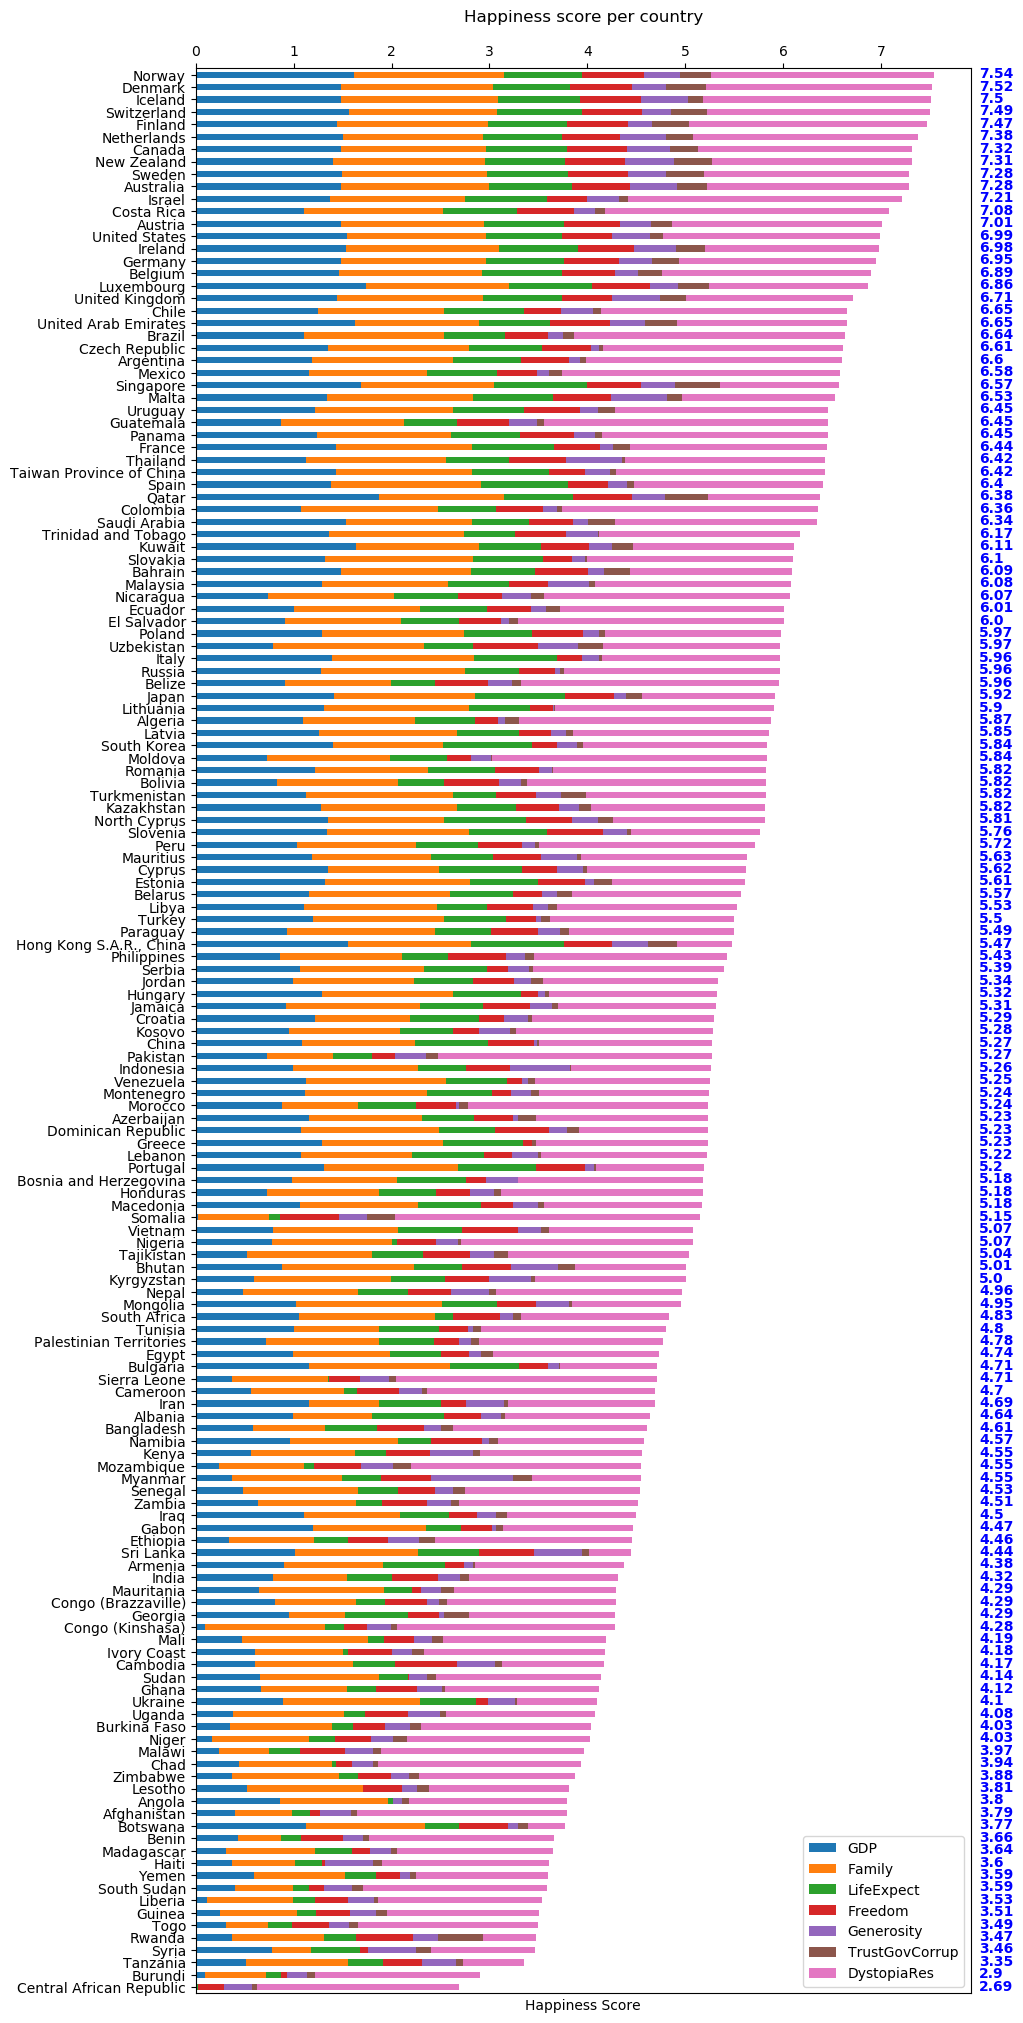

In [230]:
# Plot the ranking with barh

countries = df['Country']
df_stackvis = df[['GDP', 'Family', 'LifeExpect', 'Freedom', 'Generosity', 
                  'TrustGovCorrup', 'DystopiaRes']]
y = df['HappinessScore'].round(2)

ax = df_stackvis.plot.barh(stacked=True, figsize=(10, 25));
ax.set_yticklabels(countries)
ax.invert_yaxis()
ax.set_title('Happiness score per country', y=1.02)
ax.set_xlabel('Happiness Score')
ax.xaxis.tick_top()

for i, v in enumerate(y):
    ax.text(8, i + .25, str(v), color='blue', fontweight='bold')
    
#plt.grid(color='b', linestyle='-', linewidth=0.25)   # uncomment if you want to see a grid
plt.show()

### Exploring the happiness dataset  - some more visualizations

The happiness scores were calculated for each country based on measured factors (columns in the dataset). For example, for Denmark:

In [12]:
# Recalculate score for Denmark using the factors in the dataset.
denmark = df.iloc[1]
happyscore = (denmark['GDP'] + denmark['Family'] + denmark['LifeExpect'] + denmark['Freedom'] +
              denmark['Generosity'] + denmark['TrustGovCorrup'] + denmark['DystopiaRes'])
print(happyscore)   # 7.522 as can be seen in the table

7.5218347609043175


**Scatter plot with the relation between GDP and Happiness**  
Here you can see how GDP and happiness ranking are related.
Note that GDP is the factor contributing most to the Happiness Score.

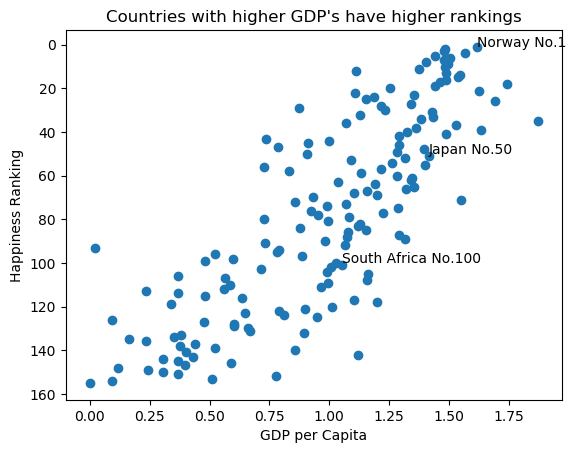

In [13]:

gdp = df['GDP']
happyrank = df['HappinessRank'] 

plt.scatter(gdp,happyrank)
plt.gca().invert_yaxis()
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Ranking')
plt.title('Countries with higher GDP\'s have higher rankings')
plt.text(1.616463, 1, 'Norway No.1')
plt.text(1.41692, 50, 'Japan No.50')
plt.text(1.0547, 100, 'South Africa No.100')

plt.show()

### Does money make people happy?

What happens to the ranking when we leave out the money factor? 

GDP is the biggest contributer to the Happiness Score. There are some small shifts in ranking when GDP is left out of the Happiness Score, but nothing major happens. (Also note that the other factors could correlate with GDP, so removing GDP will not remove the influence of money on the score completely.)

In [14]:
# Create a new column with the sum of all factors except GDP
df['HappinessScore_WithoutMoney']=0
for index, row in df.iterrows():
    newscore = row['Family'] + row['LifeExpect'] + row['Freedom'] + row['Generosity'] + row['TrustGovCorrup'] + row['DystopiaRes']
    df.loc[index, "HappinessScore_WithoutMoney"] = newscore

# Determine new ranking    
df['HappyRank_WithoutMoney'] = df['HappinessScore_WithoutMoney'].rank(ascending=False)
df['HappyRank_WithoutMoney'] = df.HappyRank_WithoutMoney.astype(int)

# Compare rankings
df_rankcompare = df[['Country','HappinessRank','HappyRank_WithoutMoney', 'HappinessScore', 'HappinessScore_WithoutMoney']]
df_rankcompare = df_rankcompare.round({'HappinessScore': 2, 'HappinessScore_WithoutMoney': 2})   # round decimals
df_rankcompare.columns = ['Country','Ranking Old','Ranking New (without GDP)', 'Score Old', 'Score New (without GDP)']
df_rankcompare.head(10)   # Look at the top 10 happiest countries

,Country,Ranking Old,Ranking New (without GDP),Score Old,Score New (without GDP)
0,Norway,1,6,7.54,5.92
1,Denmark,2,1,7.52,6.04
2,Iceland,3,3,7.50,6.02
3,Switzerland,4,5,7.49,5.93
4,Finland,5,2,7.47,6.03
5,Netherlands,6,8,7.38,5.87
6,Canada,7,10,7.32,5.84
7,New Zealand,8,7,7.31,5.91
8,Sweden,9,12,7.28,5.79
9,Australia,10,11,7.28,5.80


In [50]:
# Plot ranking without the GDP data
data4plot2 = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['HappyRank_WithoutMoney'], 
           text = df['Country'],
          colorscale = 'YlGnBu', reversescale = False)
mapspec = dict(title = 'Happiness Ranking 2017 - without GDP data', 
             geo = dict(showframe = False, projection = {'type': 'natural earth'}))
HappyMap = go.Figure(data = [data4plot2], layout=mapspec)
iplot(HappyMap)

![World Happiness ranking 2017](images/HappyRankingMap2017_noGDP.png)

### World factbook dataset
The [world factbook data](https://www.cia.gov/library/publications/the-world-factbook/) "provides information on the history, people, government, economy, energy, geography, communications, transportation, military, and transnational issues" for most countries. By introducing this data in the present analysis, we can explore which other "characteristics" of countries are also related to happiness. 

In [9]:
# Import data
df_countrydata = pd.read_csv('countries of the world.csv', decimal=",")
#df_countrydata.describe()

In [10]:
# Rename columns and look at data
df_countrydata.columns = ['Country','Region','Population','Area','PopDensity','Coastline',
                  'NetMigration','InfantMort','GDP','Literacy','Phones','Arable',
                  'Crops','Other','Climate','Birthrate','Deathrate','Agriculture',
                 'Industry','Service']
df_countrydata.head()

,Country,Region,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [11]:
# Remove white space from strings before merging datasets
df_countrydata['Country'] = df_countrydata['Country'].str.strip()   

### Merged World Happiness and World factbook data

In [114]:
# Merge the dataframes
df_merged = pd.merge(df_countrydata,
                 df[['Country', 'HappinessRank', 'HappinessScore']],
                 on='Country')
df_merged.head()

,Country,Region,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,...,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,HappinessRank,HappinessScore
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,141,3.794
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,109,4.644
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,53,5.872
3,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246,140,3.795
4,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,24,6.599


In [47]:
# There is data for 140 overlapping countries in the newly merged dataset, we lose data from 15 countries
df['Country'].isin(df_countrydata['Country']).value_counts()

True     140
False     15
Name: Country, dtype: int64

In [50]:
# The number of remaining countries can also be seen in "count" of the merged dataset
df_merged.describe()

,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,HappinessRank,HappinessScore
count,1.400000e+02,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000,138.000000,139.000000,140.000000,140.000000,140.000000,124.000000,139.000000,139.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,4.445632e+07,9.059395e+05,163.137857,2.141143,0.360643,40.030571,9640.714286,81.176087,199.243885,16.310929,2.820143,80.869214,2.157258,22.727914,10.089496,0.154064,0.308914,0.536429,76.314286,5.400786
std,1.479241e+08,2.210017e+06,567.203241,6.509479,3.661044,38.362854,10510.945966,20.982800,199.235489,14.387378,3.974952,15.919309,0.802352,11.860698,5.309217,0.143250,0.120631,0.140087,45.338072,1.136750
min,2.877300e+05,3.160000e+02,1.800000,0.000000,-8.580000,2.290000,500.000000,17.600000,1.300000,0.070000,0.000000,33.910000,1.000000,8.250000,2.410000,0.000000,0.054000,0.177000,1.000000,2.905000
25%,4.581802e+06,6.550750e+04,27.050000,0.000000,-0.765000,8.742500,1900.000000,69.925000,27.100000,4.850000,0.240000,70.292500,1.500000,12.005000,6.195000,0.040000,0.229000,0.423250,36.750000,4.529750
50%,1.026423e+07,2.421400e+05,66.600000,0.240000,0.000000,24.935000,5250.000000,90.500000,137.100000,12.250000,1.005000,85.885000,2.000000,20.480000,9.050000,0.106500,0.295000,0.549500,75.500000,5.317500
75%,2.899120e+07,7.628575e+05,124.875000,1.132500,0.882500,63.602500,12925.000000,98.000000,316.700000,23.400000,3.085000,93.775000,3.000000,30.200000,12.245000,0.224750,0.357250,0.646250,115.250000,6.347250
max,1.313974e+09,1.707520e+07,6482.200000,62.280000,23.060000,191.190000,55100.000000,100.000000,898.000000,62.110000,17.610000,99.930000,4.000000,50.730000,29.500000,0.769000,0.801000,0.860000,154.000000,7.537000


We want to remove NaNs before further analyses, so drop rows with NaNs:

In [51]:
# Drop NaNs: 121 rows left
df_merged_clean = df_merged.dropna(axis=0, how='any')
len(df_merged_clean)

121

#### Let's first look at a heatmap with correlations between happiness and the world factbook features.
Not all factors will be explored in the present analysis, but of course similar plots could be made and tests could be done for the factors that were not addressed here. 

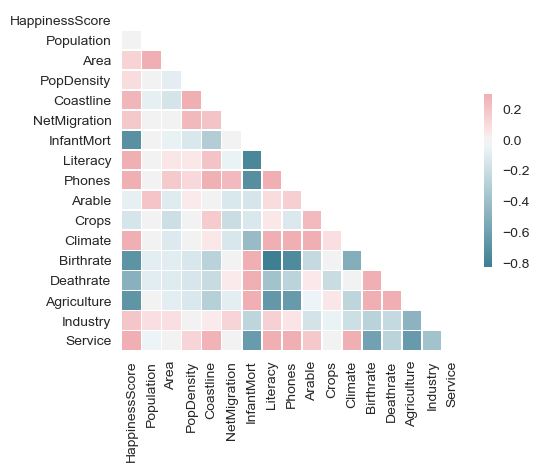

In [232]:
# Make a correlation heatmap with happiness and the world factbook features. 
# Code from Seaborn's examples: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Select and reorder the relevant columns.
df_vis = df_merged_clean[['HappinessScore', 'Population', 'Area', 'PopDensity', 
                        'Coastline', 'NetMigration', 'InfantMort', 'Literacy', 
                        'Phones', 'Arable', 'Crops', 'Climate', 'Birthrate', 
                        'Deathrate', 'Agriculture', 'Industry', 'Service']]

sns.set(style="white")
corr = df_vis.corr()

# Generate a mask the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5, 4.5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

For illustration: one of the least significant (positive) correlations is that between Population Density and Happiness Score:

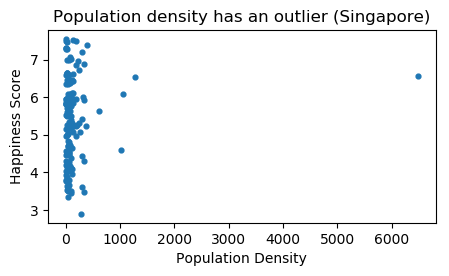

In [157]:
# Plot population density agains happiness score
popdensity1 = df_merged['PopDensity']   # used data before dropping nan's, in this case doesn't matter. 
happyscore1 = df_merged['HappinessScore'] 

fig = plt.figure(figsize=(5, 2.5))  # create the figure object
ax = fig.add_subplot(1, 1, 1)  
ax.scatter(popdensity1,happyscore1, s=12)
ax.set_xlabel('Population Density')
ax.set_ylabel('Happiness Score')
ax.set_title('Population density has an outlier (Singapore)')
plt.show()

In [61]:
# Remove very densily populated Singapore from the data
idx_outlier = df_merged['PopDensity'] < 4000
df_merged_nooutlier = df_merged[idx_outlier]

As can be seen below, there seems to be no significant correlation between population density and happiness (corresponding to what we saw in the correlation heatmap above).  
The size of the data points in the plot below indicates population size. 

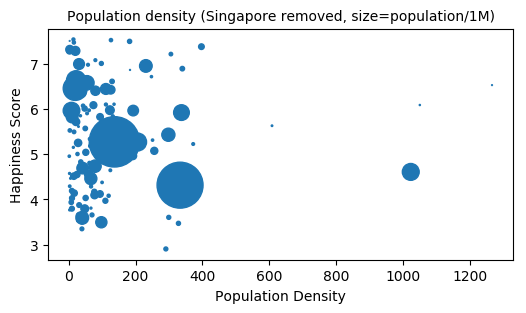

In [186]:
# Plot correlation between Population Density and Happiness Score
popdensity2 = df_merged_nooutlier['PopDensity']
happyscore2 = df_merged_nooutlier['HappinessScore'] 
size = df_merged['Population']/1000000

fig = plt.figure(figsize=(6, 3))  
ax = fig.add_subplot(1, 1, 1)  
ax.scatter(popdensity2,happyscore2, s=size)
ax.set_xlabel('Population Density')
ax.set_ylabel('Happiness Score')
ax.set_title('Population density (Singapore removed, size=population/1M)', size=10)
plt.show()

To be complete, let's calculate the correlation score and p-value

In [191]:
# Import scipy package
import scipy.stats  as stats

# calculate correlation
stats.pearsonr(df_merged_nooutlier['PopDensity'], df_merged_nooutlier['HappinessScore'])   # not significant!

(0.06871272441810128, 0.42154360183863837)

We'll now assign a color to each region, to make the following plots more intuitive.

In [106]:
# Remove white space in Region 
pd.options.mode.chained_assignment = None  # default='warn' 

df_new = df_merged_clean
df_new['Region'] = df_new['Region'].str.strip() 

In [107]:
# Unique regions
df_new["Region"].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'OCEANIA',
       'WESTERN EUROPE', 'NEAR EAST', 'SUB-SAHARAN AFRICA', 'BALTICS',
       'NORTHERN AMERICA'], dtype=object)

In [194]:
pd.options.mode.chained_assignment = None  # default='warn'   

df_new["Region"][df_new['Region'].str.contains("ASIA (EX. NEAR EAST)")] = "ASIA"
df_new["Color"]=0
df_new["Color"][df_new['Region'].str.contains("EASTERN EUROPE")] = "cadetblue"
df_new["Color"][df_new['Region'].str.contains("NORTHERN AFRICA")] = "fuchsia"
df_new["Color"][df_new['Region'].str.contains("LATIN AMER")] = "orangered"
df_new["Color"][df_new['Region'].str.contains("C.W. OF IND. STATES")] = "black"
df_new["Color"][df_new['Region'].str.contains("OCEANIA")] = "salmon"
df_new["Color"][df_new['Region'].str.contains("WESTERN EUROPE")] = "orange"
df_new["Color"][df_new['Region'].str.contains("NEAR EAST")] = "purple"
df_new["Color"][df_new['Region'].str.contains("ASIA")] = "cyan"
df_new["Color"][df_new['Region'].str.contains("SUB-SAHARAN AFRICA")] = "yellow"
df_new["Color"][df_new['Region'].str.contains("BALTICS")] = "blue"
df_new["Color"][df_new['Region'].str.contains("NORTHERN AMERICA")] = "green"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


### What about Infant mortality and happiness? Here we find a significant correlation
Higher infant mortality is seen in the least happy countries (mostly in Sub-Saharan Africa, but the country with the highest mortality is Afghanistan). However, the factors 'family' and 'life expectancy' were included in calculating the happiness score. What do these represent? Infant mortality is likely to be part of these factors as well, so the significant negative correlation found here is not very surprising...

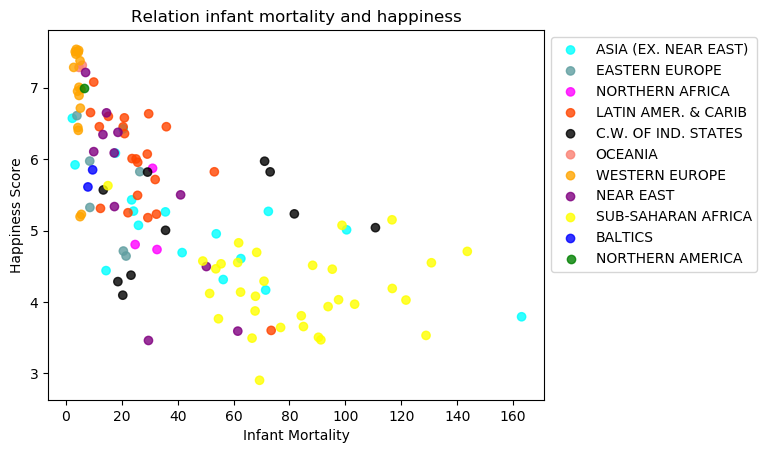

In [195]:
from matplotlib import colors as mcolors

# Plot the correlation, use different color for each region
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('InfantMort', 'HappinessScore', data=data, color='Color', label=regions[i], alpha = 0.8)

plt.xlabel('Infant Mortality')
plt.ylabel('Happiness Score')
plt.title('Relation infant mortality and happiness')
#plt.figure(figsize=(20,10))


plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [249]:
# Calculate correlation
stats.pearsonr(df_merged_nooutlier['InfantMort'], df_merged_nooutlier['HappinessScore'])

(-0.6944622851338494, 2.5320495680132847e-21)

### Is climate related to happiness?
Climate is divided into six categories (1, 1.5, 2, 2.5, 3, and 4 respectively):  
 * Climate 1. Arid to semiarid; cold winters and hot summers. 25 countries, e.g. Afghanistan, Somalia, Iran, South Africa. Mostly Near East and Sub-Saharan African regions.     
 * Climate 1.5. Extremely diverse, varying from tropical to semiarid, to subarctic. 7 countries, e.g. Bolivia, Cameroon, China, Kenya, Mexico, Nigeria, Peru. 
 * Climate 2. From tropical to cooler (in highlands), 47 countries: Latin American& Caribean, Sub-Saharan African and some Asian countries (e.g. Colombia, Guatemala, Sri Lanka, Vietnam, Sierra Leone, Zimbabwe).  
 * Climate 2.5 Diverse (polar to subtropical), 2 countries: India, Kyrgyzstan.
 * Climate 3. Cool summers, mild winters. 36 countries, mostly Western and Eastern Europe (e.g. Denmark, Norway, Latvia, Hungary). 
 * Climate 4. Hot summers, cold winters. 4 countries: Armenia, Belarus, France (including colonies), Kazakhstan.



In [104]:
# groupby climate and get summary stats
df_climate = df_merged_clean.groupby('Climate').mean()
df_climate.head(6)

,Population,Area,PopDensity,Coastline,NetMigration,InfantMort,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate,Agriculture,Industry,Service,HappinessRank,HappinessScore
Climate,,,,,,,,,,,,,,,,,,,
1.0,2.479456e+07,1.026106e+06,88.044000,1.440400,2.247200,53.277600,7752.000000,71.952000,134.680000,6.680000,0.936800,92.383200,26.871600,9.762000,0.156320,0.383240,0.460240,86.160000,5.148600
1.5,2.346604e+08,2.276453e+06,65.771429,0.152857,-1.068571,51.238571,3600.000000,84.757143,88.971429,12.304286,1.381429,86.314286,27.394286,9.985714,0.178714,0.314143,0.507429,77.000000,5.387286
2.0,2.921888e+07,5.635685e+05,261.740426,1.938298,-0.634468,56.619787,3670.212766,71.051064,73.746809,14.415532,4.260000,81.325106,30.371277,10.188936,0.227404,0.278064,0.492787,95.000000,4.917936
2.5,5.502829e+08,1.743045e+06,179.750000,0.105000,-1.260000,45.965000,2250.000000,78.250000,64.700000,30.850000,1.545000,67.605000,22.405000,7.630000,0.269500,0.242000,0.488500,110.000000,4.659500
3.0,2.805725e+07,5.416960e+05,115.402778,2.306944,0.667222,14.224722,18575.000000,96.002778,391.263889,22.678611,2.621667,74.699722,12.818889,10.213889,0.071722,0.303694,0.624583,48.027778,6.144778
4.0,2.234469e+07,8.754325e+05,66.600000,0.157500,-1.655000,17.530000,10875.000000,98.900000,316.325000,22.152500,1.255000,76.592500,12.805000,10.202500,0.105250,0.314750,0.580000,69.750000,5.551500


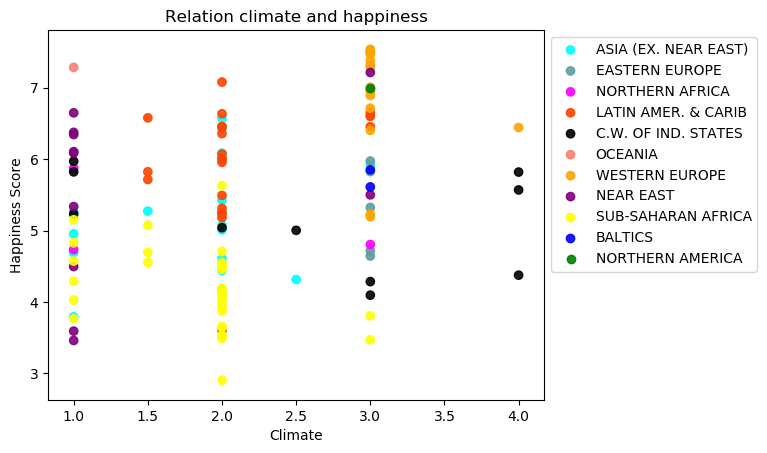

In [43]:
# Define colors and regions
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

# Plot scores per climate
for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('Climate', 'HappinessScore', data=data, color='Color', label=regions[i], alpha = 0.9)

plt.xlabel('Climate')
plt.ylabel('Happiness Score')
plt.title('Relation climate and happiness')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The result shows that there is a significant difference between climates in terms of happiness (see spearman rank correlation below). From the plot above it seems that especially people in the third climate group are happy (mean happiness of 6.14), and that this is most likely caused by the Western European countries in this sample. 

In [108]:
# Calculate rank correlation
stats.spearmanr(df_new['Climate'], df_new['HappinessScore']) 

SpearmanrResult(correlation=0.2991920614662851, pvalue=0.0008571284548688991)

However, when we run a t-test between the happiness scores for countries in climate 3 and climate 4 (the runner-up), there is no significant difference between the two climate groups: 
(in fact, happiness in climate group 3 only differs from happiness in climate groups 1, 2 and 2.5, tests not shown here).

In [112]:
#  T-test
from scipy.stats import ttest_ind

cat1 = df_merged_clean[df_merged_clean['Climate']==3]
cat2 = df_merged_clean[df_merged_clean['Climate']==4]

ttest_ind(cat1['HappinessScore'], cat2['HappinessScore'])

Ttest_indResult(statistic=0.9707312597446648, pvalue=0.33782075669671396)

### Phones and GDP are positively correlated, but do phones make people happy?
Just because phone ownership and GDP are correlated (see plot below), and GDP and happiness are highly correlated (as we have seen before), it wouldn't be fair to conclude that happiness is *caused* in part by phone ownership. Intuition would rather suggest that people living in a more prosperous country have better access to phones *and* have more reasons to be happy in general.   

However, one [study by GSMA](https://www.gsma.com/mobilefordevelopment/country/global/impact-mobile-peoples-happiness-well-being/?utm_source=link_newsv9&utm_campaign=item_226199&utm_medium=copy)  found that mobile phone ownership **when complemented by internet access** was associated with improvements in two common measures of subjective well-being: 1) the ratings people give their overall lives, and 2) the positive vs. negative emotions people experience on a daily basis (see this [source](https://news.gallup.com/opinion/gallup/226199/mobile-phones-people-happier.aspx)). This was found even after accounting for income and a range of other potentially confounding variables.   
Important side note: GSMA **represents the interests of mobile operators worldwide**.


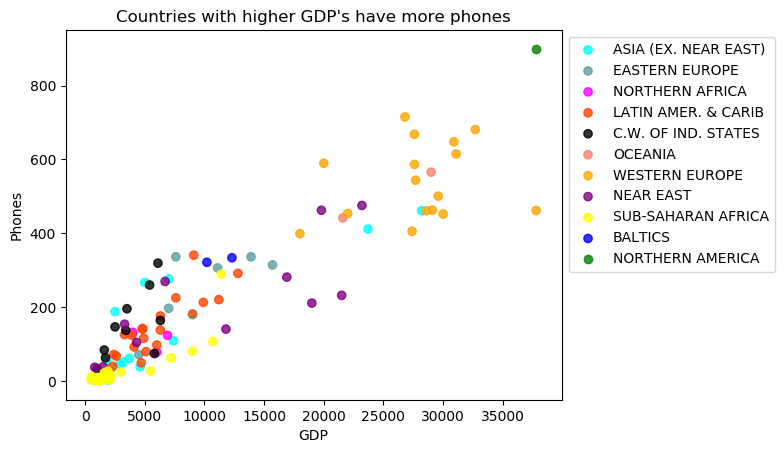

In [45]:
# Plot relation between phones and GDP
# Define colors and regions
colors = list(df_new['Color'].unique())
regions = list(df_new['Region'].unique())

# Plot phones and GDP
for i in range(0 , len(colors)):
    data = df_new.loc[df_new['Color'] == colors[i]]
    plt.scatter('GDP', 'Phones', data=data, color='Color', label=regions[i], alpha = 0.8)

plt.xlabel('GDP')
plt.ylabel('Phones')
plt.title('Countries with higher GDP\'s have more phones')
#plt.figure(figsize=(20,10))


plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [240]:
# Pearson correlation:
print("Correlation & p-val GDP and Phones: " + str(stats.pearsonr(df_new['GDP'], 
                                                                  df_new['Phones'])))
print("Correlation & p-val Happiness and Phones: " + str(stats.pearsonr(df_new['HappinessScore'], 
                                                                  df_new['Phones']))) 

Correlation & p-val GDP and Phones: (0.9234887223881976, 2.4110362725548213e-51)
Correlation & p-val Happiness and Phones: (0.7486384770355093, 5.554448870460474e-23)


In [59]:
# Plot phones variable
data4plot3 = dict(type = 'choropleth', 
           locations = df_new['Country'],
           locationmode = 'country names',
           z = df_new['Phones'], 
           text = df_new['Country'],
          colorscale = 'Reds', reversescale = False)
mapspec = dict(title = 'Phones per country (units unknown...)', 
             geo = dict(showframe = False, projection = {'type': 'natural earth'}))
PhoneMap = go.Figure(data = [data4plot3], layout=mapspec)
iplot(PhoneMap)

![Phones per Country](images/PhonesPerCountry.png)

### This was an exploration of the World Happiness Ranking 2017 and the world Factbook Data. 

**Short summary:** Western European countries were reported to be the happiest. GDP was an important factor in determining happiness. High population density was not related to happiness, but low infant mortality was. 

Also, people in certain climates appear to be happier than others, and more phones were found in regions with higher GDPs (and higher happiness). Whether or not phones make people happy cannot be concluded from the present study. 

**Future goal**: Analyzing changes over time. Happiness data for countries is now available from the same [source](http://worldhappiness.report/) for several years (2012-2018, except 2014), and it would be very interesting to explore trends in the data and to see which factors go hand in hand with *increasing* or *decreasing* happiness. 

NB: Remember that correlation does not imply causation.  

Thank you for reading!